# Script to analyse pocket results

### From Natália Aniceto

In [1]:
#Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [98]:
colors=["#5dade2","#FFC300"]
colors_keys={"TIGIT":"#5dade2", "PD-L1":"#FFC300"}

In [31]:
tigit_props = pd.read_csv("3UCR_Protein.txt", sep="\t")
tigit_pocket = pd.read_csv("3UCR_Pocket.txt", sep="\t")
tigit_pocket = [x.split(")")[0] for x in tigit_pocket.Residues.values[0].split("(")][1:]
number_of_first_chain = len(tigit_pocket[0].split(" "))
tigit_pocket = np.hstack([x.split(" ") for x in tigit_pocket])
tigit_pocket_chain = []

for x in range(len(tigit_pocket)):
    if x < number_of_first_chain:
        tigit_pocket_chain.append(tigit_pocket[x] + "-A")
    else:
        tigit_pocket_chain.append(tigit_pocket[x] + "-B")

tigit_props.loc[:,"residues"] = (tigit_props.Res + tigit_props.UID.astype(str) + "-" + tigit_props.Chain.str.split('.').str[1])
tigit_props = tigit_props[np.in1d(tigit_props.residues, tigit_pocket_chain)]

In [32]:
tigit_props

,Chain,Res,UID,res_ASA,res_exp,res_charge,propKa,res_hyd,res_pos,res_neg,residues
33,3UCR.A,GLN,49,0.0,0.00,0.01,NaN,0.0,0.0,0.0,GLN49-A
35,3UCR.A,ASN,51,1.1,0.63,0.05,NaN,0.0,0.0,0.0,ASN51-A
37,3UCR.A,GLU,53,5.4,2.60,-0.98,6.35,0.1,0.0,16.1,GLU53-A
39,3UCR.A,GLN,55,81.4,40.73,0.01,NaN,0.0,0.0,18.2,GLN55-A
40,3UCR.A,ASP,56,145.7,82.48,-1.09,3.80,0.0,0.0,59.2,ASP56-A
41,3UCR.A,GLN,57,101.3,50.71,0.01,NaN,0.0,0.0,0.4,GLN57-A
42,3UCR.A,LEU,58,0.0,0.00,-0.03,NaN,0.0,0.0,10.9,LEU58-A
45,3UCR.A,ILE,61,0.0,0.00,-0.05,NaN,0.0,0.0,0.0,ILE61-A
55,3UCR.A,SER,71,0.8,0.56,-0.01,NaN,0.0,0.0,0.0,SER71-A
56,3UCR.A,PRO,72,90.5,52.69,-0.17,NaN,0.0,0.0,0.0,PRO72-A


In [33]:
#It has to have the same number of rows
len(tigit_pocket_chain), tigit_props.shape

(29, (29, 11))

In [34]:
pdl1_props = pd.read_csv("5JDR_Protein.txt", sep="\t")
pdl1_pocket = pd.read_csv("5JDR_Pocket.txt", sep="\t")
pdl1_pocket = [x.split(")")[0] for x in pdl1_pocket.Residues.values[0].split("(")][1:]
number_of_first_chain = len(pdl1_pocket[0].split(" "))
pdl1_pocket = np.hstack([x.split(" ") for x in pdl1_pocket])
pdl1_pocket_chain = []

for x in range(len(pdl1_pocket)):
    if x < number_of_first_chain:
        pdl1_pocket_chain.append(pdl1_pocket[x] + "-A")
    else:
        pdl1_pocket_chain.append(pdl1_pocket[x] + "-B")

pdl1_props.loc[:,"residues"] = (pdl1_props.Res + pdl1_props.UID.astype(str) + "-" + pdl1_props.Chain.str.split('.').str[1])
pdl1_props = pdl1_props[np.in1d(pdl1_props.residues, pdl1_pocket_chain)]

In [35]:
pdl1_props

,Chain,Res,UID,res_ASA,res_exp,res_charge,propKa,res_hyd,res_pos,res_neg,residues
0,5JDR.A,THR,22,99.9,57.30,-0.70,6.72,0.0,4.9,0.0,THR22-A
1,5JDR.A,VAL,23,29.4,15.03,-0.05,NaN,0.0,3.8,0.6,VAL23-A
2,5JDR.A,PRO,24,42.7,24.88,-0.16,NaN,0.0,0.0,0.0,PRO24-A
17,5JDR.A,GLU,39,2.0,0.96,-1.05,2.53,0.0,0.0,0.0,GLU39-A
19,5JDR.A,LYS,41,14.5,6.17,1.03,9.91,0.0,0.0,0.0,LYS41-A
20,5JDR.A,PHE,42,21.1,8.06,0.03,NaN,0.0,0.0,0.0,PHE42-A
21,5JDR.A,PRO,43,123.4,71.87,-0.16,NaN,0.0,0.0,0.0,PRO43-A
22,5JDR.A,VAL,44,32.5,16.65,-0.05,NaN,0.0,0.0,0.0,VAL44-A
23,5JDR.A,GLU,45,175.4,84.55,-1.05,4.50,0.0,0.0,39.8,GLU45-A
24,5JDR.A,LYS,46,167.1,70.98,1.04,10.50,0.0,41.1,0.0,LYS46-A


In [36]:
len(pdl1_pocket), pdl1_props.shape

(37, (37, 11))

In [37]:
pdl1_props.loc[:,"prot"]="PD-L1"
tigit_props.loc[:,"prot"]="TIGIT"
# proteasome_props.loc[:,"prot"]="P20S"
# ezh2_props.loc[:,"prot"]="EZH2"

In [50]:
ratio_patch_pdl1 = (pdl1_props.res_pos.sum() + pdl1_props.res_neg.sum())/ pdl1_props.res_hyd.sum()
ratio_patch_tigit = (tigit_props.res_pos.sum() + tigit_props.res_neg.sum())/tigit_props.res_hyd.sum()
ratio_asa_pdl1 = (pdl1_props.query("res_pos>0").res_ASA.values.sum()+pdl1_props.query("res_neg>0").res_ASA.values.sum())/pdl1_props.query("res_hyd>0").res_ASA.values.sum()
ratio_asa_tigit = (tigit_props.query("res_pos>0").res_ASA.values.sum()+tigit_props.query("res_neg>0").res_ASA.values.sum())/tigit_props.query("res_hyd>0").res_ASA.values.sum()

print(ratio_asa_tigit)
print(ratio_asa_pdl1)

1.5826884494124391
10.24347014925373


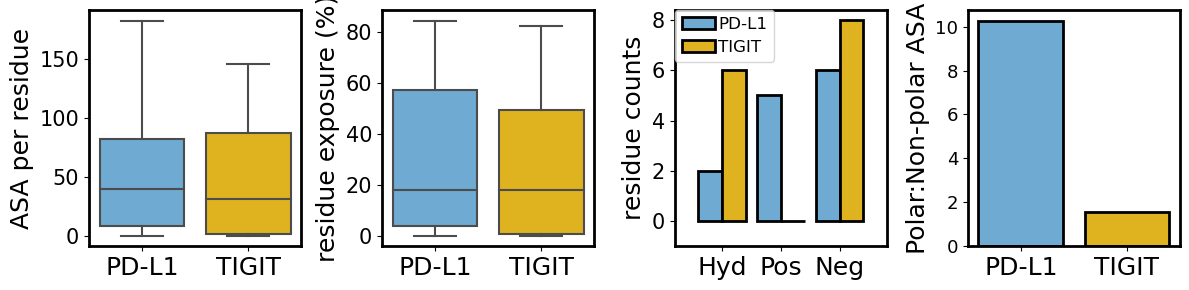

In [99]:
mpl.rcParams["figure.figsize"]=(12,3)
bothtargets = pd.concat([pdl1_props, tigit_props])
plt.subplot(1,4,1)
#sns.boxplot(y="res_ASA",x="prot",data=bothtargets, palette=colors)
sns.boxplot(y="res_ASA",x="prot",data=bothtargets.sort_values("prot"), palette=colors)

plt.xlabel("")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.ylabel("ASA per residue", fontsize=18)
border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)


plt.subplot(1,4,2)
sns.boxplot(y="res_exp",x="prot",data=bothtargets.sort_values("prot"), palette=colors)
plt.xlabel("")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.ylabel("residue exposure (%)", fontsize=18)
border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)

plt.subplot(1,4,3)
res_counts = bothtargets.set_index("prot")[["res_hyd", "res_pos", "res_neg"]]>0
res_counts = res_counts.reset_index().groupby("prot").sum().reset_index().melt("prot")
res_counts =  res_counts.replace({"res_hyd":"Hyd","res_pos":"Pos", "res_neg":"Neg"})
sns.barplot(x="variable", y="value", hue="prot",data=res_counts, palette=colors, linewidth=2, edgecolor="k")
plt.legend(title="", fontsize=12, borderaxespad=0, handletextpad=0.2, loc="best")
# plt.legend(title="", fontsize=14, borderaxespad=0, handletextpad=0.2, loc="best")
plt.ylabel("residue counts", fontsize=18)
plt.ylim(-1)
plt.xlim(-0.8, 2.8)
plt.xlabel("")
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)
border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)


plt.subplot(1,4,4)
sns.barplot(x=["PD-L1", "TIGIT"], y=[ratio_asa_pdl1, ratio_asa_tigit], palette=["#5dade2","#FFC300"], edgecolor="k", linewidth=2)
plt.ylabel("Polar:Non-polar ASA", fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=18)
border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("pocket_properties.svg", dpi=300)

In [59]:
pdl1_props.res_ASA.sum(), pdl1_props.query("res_exp > 50").shape[0]

(2042.3, 10)

In [60]:
tigit_props.res_ASA.sum(), tigit_props.query("res_exp > 50").shape[0]

(1340.8999999999999, 7)